In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import scipy as scp

In [2]:
df=pd.read_csv("LondonAirbnb.csv")

In [3]:
df[0:5]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20210706215658,2021-07-08,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments my flat gives yo...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039,https://www.airbnb.com/users/show/43039,...,4.85,4.53,4.52,NaN,f,3,3,0,0,1.63
1,13913,https://www.airbnb.com/rooms/13913,20210706215658,2021-07-08,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,4.89,4.63,4.74,NaN,f,2,1,1,0,0.17
2,15400,https://www.airbnb.com/rooms/15400,20210706215658,2021-07-08,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,4.82,4.93,4.73,NaN,t,1,1,0,0,0.81
3,17402,https://www.airbnb.com/rooms/17402,20210706215658,2021-07-08,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,4.66,4.85,4.59,NaN,f,15,15,0,0,0.36
4,17506,https://www.airbnb.com/rooms/17506,20210706215658,2021-07-08,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2,0,2,0,NaN


In [4]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [5]:
df=df.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed','amenities', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication','review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms','availability_30','availability_60','availability_90','minimum_nights','review_scores_location'])

In [6]:
df=df.drop(columns=["neighbourhood","property_type","bathrooms"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73364 entries, 0 to 73363
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              73364 non-null  int64  
 1   neighbourhood_cleansed          73364 non-null  object 
 2   latitude                        73364 non-null  float64
 3   longitude                       73364 non-null  float64
 4   room_type                       73364 non-null  object 
 5   accommodates                    73364 non-null  int64  
 6   bathrooms_text                  73181 non-null  object 
 7   bedrooms                        68712 non-null  float64
 8   beds                            72143 non-null  float64
 9   price                           73364 non-null  object 
 10  maximum_nights                  73364 non-null  int64  
 11  has_availability                73364 non-null  object 
 12  review_scores_rating            

In [8]:
df.describe()

,id,latitude,longitude,accommodates,bedrooms,beds,maximum_nights,review_scores_rating,calculated_host_listings_count,reviews_per_month
count,7.336400e+04,73364.000000,73364.000000,73364.000000,68712.000000,72143.000000,7.336400e+04,50786.000000,73364.000000,50786.000000
mean,2.728494e+07,51.509863,-0.128646,3.002276,1.481080,1.684280,1.455693e+04,4.513564,28.106128,0.632481
std,1.440012e+07,0.047742,0.095956,1.916437,0.869448,1.273564,3.692304e+06,0.962358,111.625202,1.165870
min,1.155100e+04,51.296850,-0.496160,0.000000,1.000000,0.000000,1.000000e+00,0.000000,1.000000,0.010000
25%,1.575397e+07,51.484330,-0.188410,2.000000,1.000000,1.000000,3.500000e+01,4.500000,1.000000,0.090000
50%,2.724552e+07,51.513990,-0.126230,2.000000,1.000000,1.000000,1.125000e+03,4.800000,1.000000,0.290000
75%,3.996368e+07,51.539470,-0.069657,4.000000,2.000000,2.000000,1.125000e+03,5.000000,4.000000,0.790000
max,5.086939e+07,51.679830,0.288570,16.000000,22.000000,38.000000,1.000000e+09,5.000000,861.000000,67.000000


## Price Column

In [9]:
df["price"].isnull().sum()

0

In [10]:
df["price"]

0         $99.00
1         $65.00
2         $75.00
3        $307.00
4        $150.00
          ...   
73359    $276.00
73360    $117.00
73361     $48.00
73362     $56.00
73363     $32.00
Name: price, Length: 73364, dtype: object

In [11]:
for i in range(len(df)):
    df["price"].iloc[i]=df["price"].iloc[i][1:]

C:\Users\2192a\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [12]:
a=df.price.str.extract('(^\d*)')

In [13]:
df["price"]=a

In [14]:
df["price"]=df["price"].astype(float)

In [15]:
df = df[(df['price'] < 300)]

Updated Displot After Removal Of Outliers

<AxesSubplot:xlabel='price'>

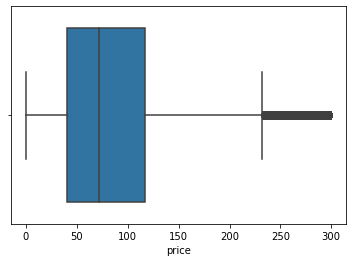

In [16]:
sns.boxplot(x="price",data=df)

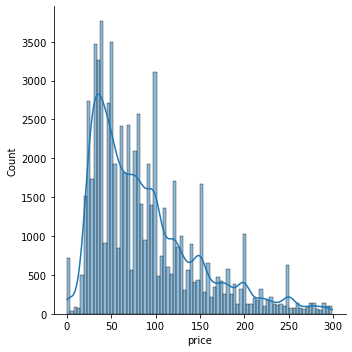

In [17]:
sns.displot(data=df,x="price",kde=True)

## Bathrooms

In [18]:
df["bathrooms_text"].fillna(value="1",inplace=True)

In [19]:
df["bathrooms_text"].unique()

array(['1 bath', '1 shared bath', '1 private bath', '1.5 shared baths',
       '1.5 baths', '0 shared baths', '1', '2 baths', '2.5 shared baths',
       '2 shared baths', 'Shared half-bath', '2.5 baths', '4 baths',
       '3 baths', '0 baths', '3 shared baths', 'Half-bath', '5 baths',
       '3.5 baths', '5 shared baths', '3.5 shared baths',
       'Private half-bath', '4 shared baths', '4.5 baths', '6 baths',
       '6 shared baths', '8.5 baths', '7 shared baths', '7 baths',
       '6.5 baths', '8 shared baths', '17 baths', '10 baths', '5.5 baths',
       '8 baths', '10.5 baths', '4.5 shared baths', '9 shared baths',
       '6.5 shared baths', '10 shared baths', '18 shared baths',
       '12 baths'], dtype=object)

In [20]:
for i in range(len(df)):
    if df["bathrooms_text"].iloc[i]=="Private half-bath":
        df["bathrooms_text"].iloc[i]="1"
    elif df["bathrooms_text"].iloc[i]=="Half-bath":
        df["bathrooms_text"].iloc[i]="1"
    elif df["bathrooms_text"].iloc[i]=="Shared half-bath":
        df["bathrooms_text"].iloc[i]="1"
    else:
        df["bathrooms_text"].iloc[i]=df["bathrooms_text"].iloc[i][0]      

C:\Users\2192a\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [21]:
df["bathrooms"]=df["bathrooms_text"].astype(float)

In [22]:
df.drop(columns="bathrooms_text",inplace=True)

##  has_availability Column

In [23]:
df["has_availability"].isnull().sum()

0

No Null Values

Encoding Based On Mean Price

In [24]:
df["has_availability"].unique()

array(['t', 'f'], dtype=object)

In [25]:
c=0
d=0
e=0
f=0
for i in range(len(df)):
    if df["has_availability"].iloc[i]=="t":
        c=c+1
        e=e+df["price"].iloc[i]
    else:
        d=d+1
        f=f+df["price"].iloc[i]

print(e/c)
print(f/d)

87.2987346226595
76.66993464052288


In [26]:
for i in range(len(df)):
    if df["has_availability"].iloc[i]=="t":
        df["has_availability"].iloc[i]=int(1)
    else:
        df["has_availability"].iloc[i]=int(0)

## Number Of Reviews Per Month

In [27]:
df["reviews_per_month"].isnull().sum()

20567

Fixing The Null Values With Column Median

In [28]:
mean_value=df['reviews_per_month'].mean()
df["reviews_per_month"]=df["reviews_per_month"].fillna(value=mean_value)

## Bedrooms

In [29]:
df["bedrooms"].isnull().sum()

4561

In [30]:
df["bedrooms"]=df["bedrooms"].fillna(value=int(1))

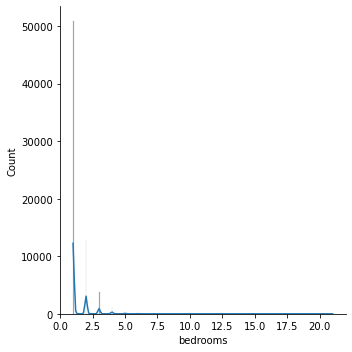

In [31]:
sns.displot(data=df,x="bedrooms",kde=True)

## room_type

In [32]:
df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [33]:
df["room_type"].isnull().sum()

0

In [34]:
a=0
b=0
c=0
d=0
e=0
f=0
g=0
h=0
for i in range(len(df)):
    if df["room_type"].iloc[i]=="Entire home/apt":
        a=a+1
        e=e+df["price"].iloc[i]
    elif df["room_type"].iloc[i]=="Private room":
        b=b+1
        f=f+df["price"].iloc[i]
    elif df["room_type"].iloc[i]=="Hotel room":
        c=c+1
        g=g+df["price"].iloc[i]
    else:
        d=d+1
        h=h+df["price"].iloc[i]

print(e/a)
print(f/b)
print(g/c)
print(h/d)

120.04748603351955
50.43476223208148
106.51449275362319
46.68207024029575


Entire Home/Apt - 120
Private room - 50.43
Hotel room - 106.5
Shared room - 46.68

In [35]:
for i in range(len(df)):
    if df["room_type"].iloc[i]=="Shared room":
        df["room_type"].iloc[i]=int(0)
    elif df["room_type"].iloc[i]=="Private room":
        df["room_type"].iloc[i]=int(1)
    elif df["room_type"].iloc[i]=="Hotel room":
        df["room_type"].iloc[i]=int(2)
    else:
        df["room_type"].iloc[i]=int(3)

C:\Users\2192a\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## Neighbourhood

In [36]:
df["neighbourhood_cleansed"].unique()

array(['Lambeth', 'Islington', 'Kensington and Chelsea',
       'Hammersmith and Fulham', 'Barnet', 'Hounslow',
       'Richmond upon Thames', 'Haringey', 'Southwark', 'Croydon',
       'Westminster', 'Waltham Forest', 'Brent', 'Camden', 'Newham',
       'Tower Hamlets', 'Redbridge', 'Hackney', 'Merton', 'Lewisham',
       'Wandsworth', 'Bromley', 'Havering', 'Greenwich', 'Ealing',
       'Enfield', 'City of London', 'Barking and Dagenham', 'Hillingdon',
       'Harrow', 'Kingston upon Thames', 'Bexley', 'Sutton'], dtype=object)

In [39]:
import category_encoders as ce
encoder=ce.TargetEncoder(cols='neighbourhood_cleansed')
df["neighbourhood_cleansed"]=encoder.fit_transform(df['neighbourhood_cleansed'],df['price'])

C:\Users\2192a\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


## beds

In [40]:
df["beds"].isnull().sum()

1193

In [41]:
df["beds"]=df["beds"].fillna(value=int(0))

## Review Scores Rating

In [42]:
df["review_scores_rating"].isnull().sum()

20567

In [43]:
mean_value=df['review_scores_rating'].mean()
df["review_scores_rating"]=df["review_scores_rating"].fillna(value=mean_value)

In [44]:
df[0:3]

,id,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,maximum_nights,has_availability,review_scores_rating,calculated_host_listings_count,reviews_per_month,bathrooms
0,11551,79.378683,51.46095,-0.11758,3,4,1.0,3.0,99.0,1125,1,4.57,3,1.63,1.0
1,13913,88.411969,51.56861,-0.11270,1,2,1.0,0.0,65.0,29,1,4.85,2,0.17,1.0
2,15400,123.705444,51.48780,-0.16813,3,2,1.0,1.0,75.0,50,1,4.79,1,0.81,1.0


## Accomodates

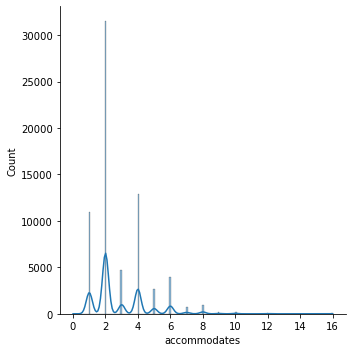

In [45]:
sns.displot(data=df,x="accommodates",kde=True)

<AxesSubplot:xlabel='accommodates'>

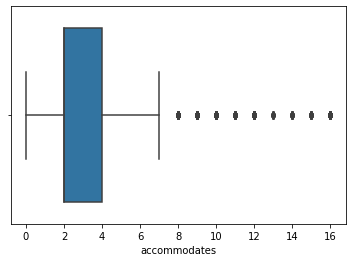

In [46]:
sns.boxplot(data=df,x="accommodates")

## Calculated Host Listings 

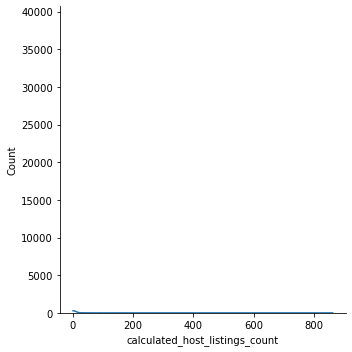

In [47]:
sns.displot(data=df,x="calculated_host_listings_count",kde=True)

<AxesSubplot:xlabel='calculated_host_listings_count'>

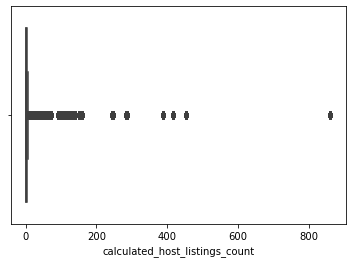

In [48]:
sns.boxplot(data=df,x="calculated_host_listings_count")

In [49]:
df = df[(df['calculated_host_listings_count'] < 100)]

# Model Building And Scaling

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65695 entries, 0 to 73363
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65695 non-null  int64  
 1   neighbourhood_cleansed          65695 non-null  float64
 2   latitude                        65695 non-null  float64
 3   longitude                       65695 non-null  float64
 4   room_type                       65695 non-null  object 
 5   accommodates                    65695 non-null  int64  
 6   bedrooms                        65695 non-null  float64
 7   beds                            65695 non-null  float64
 8   price                           65695 non-null  float64
 9   maximum_nights                  65695 non-null  int64  
 10  has_availability                65695 non-null  object 
 11  review_scores_rating            65695 non-null  float64
 12  calculated_host_listings_count  

In [51]:
df["room_type"]=df["room_type"].astype(float)

In [52]:
df["has_availability"]=df["has_availability"].astype(float)

In [53]:
df

,id,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,maximum_nights,has_availability,review_scores_rating,calculated_host_listings_count,reviews_per_month,bathrooms
0,11551,79.378683,51.460950,-0.117580,3.0,4,1.0,3.0,99.0,1125,1.0,4.570000,3,1.630000,1.0
1,13913,88.411969,51.568610,-0.112700,1.0,2,1.0,0.0,65.0,29,1.0,4.850000,2,0.170000,1.0
2,15400,123.705444,51.487800,-0.168130,3.0,2,1.0,1.0,75.0,50,1.0,4.790000,1,0.810000,1.0
4,17506,94.863014,51.479350,-0.197430,1.0,2,1.0,1.0,150.0,21,1.0,4.513577,2,0.637941,1.0
5,25123,73.948243,51.574380,-0.210810,1.0,2,1.0,0.0,29.0,1120,1.0,4.780000,3,0.980000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73359,50866999,118.460762,51.517627,-0.148625,3.0,6,3.0,3.0,276.0,90,1.0,4.513577,9,0.637941,2.0
73360,50867160,100.236120,51.540537,-0.194614,3.0,4,2.0,2.0,117.0,30,1.0,4.513577,5,0.637941,2.0
73361,50867775,79.931695,51.554799,-0.073718,3.0,2,1.0,0.0,48.0,10,1.0,4.513577,2,0.637941,1.0
73362,50868408,79.931695,51.554562,-0.073245,3.0,2,1.0,0.0,56.0,1125,1.0,4.513577,2,0.637941,1.0


In [54]:
df["review_scores_rating"]=df["review_scores_rating"].astype(float)

In [55]:
df["reviews_per_month"]=df["reviews_per_month"].astype(float)

In [56]:
df.corr()

,id,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,maximum_nights,has_availability,review_scores_rating,calculated_host_listings_count,reviews_per_month,bathrooms
id,1.000000,0.037677,-0.011257,-0.009605,0.048788,0.024699,0.004035,-0.007093,0.054321,-0.006087,0.015545,-0.017744,0.193011,0.046496,0.011237
neighbourhood_cleansed,0.037677,1.000000,-0.046838,-0.318345,0.209513,0.082926,0.002342,0.031645,0.313652,0.002843,0.015973,-0.003188,0.197289,0.064794,0.022647
latitude,-0.011257,-0.046838,1.000000,0.104669,0.000040,-0.002344,-0.014544,-0.007183,-0.016497,0.002955,0.004735,-0.005088,-0.004969,-0.010543,-0.000245
longitude,-0.009605,-0.318345,0.104669,1.000000,-0.052804,-0.020317,-0.018941,-0.019153,-0.090375,-0.002517,-0.001606,-0.004965,-0.060286,-0.037564,-0.017454
room_type,0.048788,0.209513,0.000040,-0.052804,1.000000,0.539342,0.404000,0.361266,0.593141,-0.004014,0.020130,0.042159,0.111060,-0.041928,0.150095
accommodates,0.024699,0.082926,-0.002344,-0.020317,0.539342,1.000000,0.760805,0.768301,0.575556,0.000321,0.010020,0.021780,0.098681,-0.013582,0.412303
bedrooms,0.004035,0.002342,-0.014544,-0.018941,0.404000,0.760805,1.000000,0.726516,0.488769,-0.001984,0.006277,0.021605,0.022716,-0.048313,0.494838
beds,-0.007093,0.031645,-0.007183,-0.019153,0.361266,0.768301,0.726516,1.000000,0.427029,-0.001909,0.009946,0.015437,0.069234,-0.015571,0.392680
price,0.054321,0.313652,-0.016497,-0.090375,0.593141,0.575556,0.488769,0.427029,1.000000,-0.003164,0.019599,0.038987,0.182175,-0.015782,0.278695
maximum_nights,-0.006087,0.002843,0.002955,-0.002517,-0.004014,0.000321,-0.001984,-0.001909,-0.003164,1.000000,0.000474,0.001801,-0.000564,-0.001576,-0.001513


In [57]:
data=df.drop(columns=['id','latitude','longitude'])

In [58]:
X=data.drop(columns=['price'])
y=data['price']

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [63]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

ValueError: source code string cannot contain null bytes

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1)) 
    
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=['mean_absolute_error'])
    return model
    
model = KerasRegressor(build_fn=create_model)

In [ ]:
layers = [[25], [36, 18], [30,20,10]]
activations = ['linear', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[8])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)
[grid_result.best_score_,grid_result.best_params_]

In [ ]:
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(units=10, kernel_initializer = 'he_uniform',activation='relu',input_dim = X_train.shape[1]))

# Adding the second hidden layer
regressor.add(Dense(units=30,kernel_initializer="he_uniform",activation='relu'))
# Adding the output layer
regressor.add(Dense(units=20, kernel_initializer = 'he_uniform', activation = 'relu'))
regressor.add(Dense(units=10, kernel_initializer = 'he_uniform', activation = 'relu'))
# Compiling the ANN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

# Fitting the ANN to the Training set
model_history=regressor.fit(X_train, y_train,validation_split=0.33, batch_size = 128, epochs=48)
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred, y_test)


In [ ]:
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred,squared=False)